In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Test Blind Color

In [6]:
def simulate_colorblindness(image, blindness_type):
    """
    Simulate how colorblind people see colors.
    """
    # Transform matrices for different types of colorblindness
    matrices = {
        "normal": np.eye(3),
        "protanopia": np.array([
            [0.567, 0.433, 0],
            [0.558, 0.442, 0],
            [0, 0.242, 0.758]
        ]),
        "deuteranopia": np.array([
            [0.625, 0.375, 0],
            [0.7, 0.3, 0],
            [0, 0.3, 0.7]
        ]),
        "tritanopia": np.array([
            [0.95, 0.05, 0],
            [0, 0.433, 0.567],
            [0, 0.475, 0.525]
        ]),
        "protanomaly": np.array([
            [0.817, 0.183, 0],
            [0.333, 0.667, 0],
            [0, 0.125, 0.875]
        ]),
        "deuteranomaly": np.array([
            [0.8, 0.2, 0],
            [0.258, 0.742, 0],
            [0, 0.142, 0.858]
        ]),
        "tritanomaly": np.array([
            [0.967, 0.033, 0],
            [0, 0.733, 0.267],
            [0, 0.183, 0.817]
        ]),
        "achromatopsia": np.array([
            [0.299, 0.587, 0.114],
            [0.299, 0.587, 0.114],
            [0.299, 0.587, 0.114]
        ])
    }

    if blindness_type not in matrices:
        raise ValueError(f"Invalid blindness type: {blindness_type}")

    # Apply the transformation matrix to simulate colorblindness
    matrix = matrices[blindness_type]
    transformed_image = np.dot(image / 255.0, matrix.T)
    transformed_image = np.clip(transformed_image, 0, 1) * 255
    return transformed_image.astype(np.uint8)

### Langkah-langkah dalam Fungsi `simulate_colorblindness`

1. **Matriks Transformasi untuk Setiap Jenis Buta Warna:**
   Setiap jenis buta warna memiliki matriks transformasi yang berbeda. Matriks ini digunakan untuk mengubah warna gambar agar sesuai dengan cara orang yang memiliki jenis buta warna tersebut melihatnya. Matriks tersebut memiliki ukuran 3x3 karena gambar RGB memiliki tiga saluran warna (merah, hijau, biru). 

   - **Matriks identitas (`np.eye(3)`)** digunakan untuk orang dengan penglihatan normal (tidak buta warna).
   - Matriks lainnya untuk jenis buta warna seperti *protanopia*, *deuteranopia*, *tritanopia*, dan lainnya mengubah proporsi saluran warna untuk meniru bagaimana orang dengan jenis buta warna tersebut melihat warna.

2. **Penerapan Matriks pada Gambar:**
   - **Pembagian dengan 255.0:** Gambar dibagi dengan 255 untuk mengubah nilai warna gambar dari rentang [0, 255] menjadi [0, 1], karena matriks transformasi bekerja dalam rentang [0, 1].
   
   - **Perkalian Matriks:** Matriks transformasi yang sesuai untuk jenis buta warna yang dipilih kemudian dikalikan dengan gambar yang telah dinormalisasi. Operasi perkalian matriks ini mengubah warna setiap piksel berdasarkan matriks transformasi. 
     - `np.dot(image / 255.0, matrix.T)` melakukan perkalian matriks antara gambar (sebagai array RGB) dan matriks transformasi (yang telah ditransposisikan).
   
   - **Pemangkasan dan Pengembalian ke Rentang [0, 255]:** Setelah perkalian matriks, gambar akan diubah ke rentang [0, 1]. Kemudian, kita mengalikan hasilnya dengan 255 dan memangkasinya kembali ke rentang [0, 255] untuk menghasilkan gambar dalam format uint8 (format gambar standar).
     - `np.clip(transformed_image, 0, 1) * 255` memastikan bahwa nilai warna piksel tetap berada dalam rentang yang valid.

3. **Kembalikan Gambar yang Telah Ditransformasi:**
   Hasilnya adalah gambar yang telah disesuaikan dengan cara orang dengan buta warna melihatnya. Gambar tersebut dikembalikan dalam format `np.uint8`, yang adalah format yang biasa digunakan untuk gambar.

### Penjelasan Matriks Buta Warna

Matriks transformasi untuk masing-masing jenis buta warna diatur untuk mengubah proporsi saluran warna RGB (Red, Green, Blue). Berikut adalah penjelasan tentang beberapa matriks yang ada:

- **Protanopia:** Orang dengan protanopia tidak dapat melihat warna merah dengan baik. Matriks ini mengurangi pengaruh warna merah dan meningkatkan pengaruh warna hijau dan biru.
  
- **Deuteranopia:** Orang dengan deuteranopia tidak dapat melihat warna hijau dengan baik. Matriks ini mengurangi pengaruh warna hijau dan meningkatkan pengaruh warna merah dan biru.

- **Tritanopia:** Orang dengan tritanopia tidak dapat melihat warna biru dengan baik. Matriks ini mengurangi pengaruh warna biru dan meningkatkan pengaruh warna merah dan hijau.

- **Achromatopsia:** Orang dengan achromatopsia melihat dunia dalam hitam-putih (tidak ada warna). Matriks ini mengubah gambar menjadi abu-abu dengan menggunakan proporsi cahaya dari merah, hijau, dan biru.

### Contoh Penggunaan Fungsi:

Untuk menggunakan fungsi ini, Anda bisa memberikan gambar yang telah dibaca dengan OpenCV dan menentukan jenis buta warna yang ingin disimulasikan:

```python
import cv2
import numpy as np

# Membaca gambar
image = cv2.imread('image.jpeg')

# Menyimulasikan buta warna (misalnya protanopia)
simulated_image = simulate_colorblindness(image, 'protanopia')

# Menampilkan gambar yang telah disimulasikan
cv2.imshow("Simulated Protanopia", simulated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

### Kesimpulan:
Fungsi ini mensimulasikan penglihatan orang dengan buta warna berdasarkan transformasi matriks warna RGB yang sesuai. Dengan cara ini, Anda dapat memvisualisasikan bagaimana sebuah gambar akan terlihat oleh orang dengan berbagai jenis buta warna, baik itu protanopia, deuteranopia, tritanopia, maupun jenis buta warna lainnya.

In [7]:
# Load the RGB image
image = cv2.imread("RGB.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

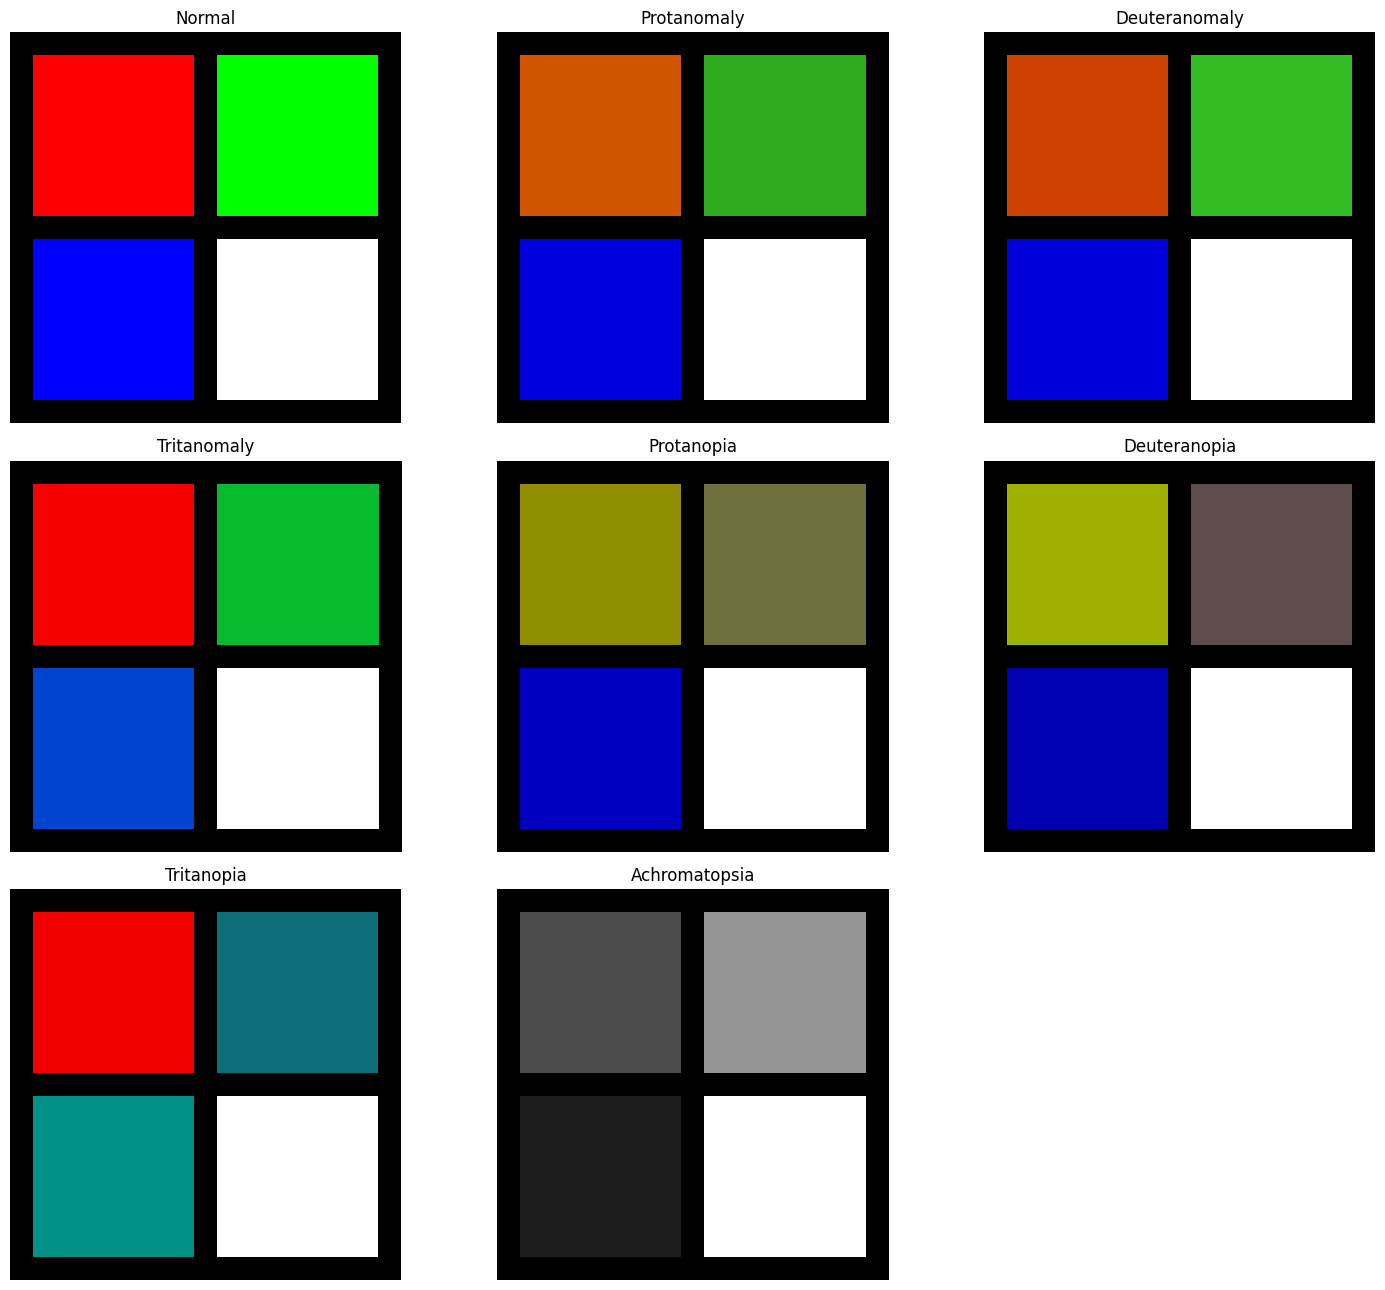

In [8]:
# Simulate different types of colorblindness
types = [
    "normal", "protanomaly", "deuteranomaly", "tritanomaly",
    "protanopia", "deuteranopia", "tritanopia", "achromatopsia"
]

# Create subplots to display all types
plt.figure(figsize=(15, 13))
for i, blindness_type in enumerate(types, 1):
    transformed_image = simulate_colorblindness(image, blindness_type)
    plt.subplot(3, 3, i)
    plt.imshow(transformed_image)
    plt.title(blindness_type.capitalize())
    plt.axis("off")

plt.tight_layout()
plt.show()

# Test Pola

## Mengonversi ke Ruang Warna yang Berbeda

**`cv2.cvtColor()`** Mengonversi gambar dari satu ruang warna ke ruang warna lainnya. Fungsi ini mengonversi gambar masukan dari satu ruang warna ke ruang warna lainnya. Dalam hal transformasi ke-dari ruang warna RGB, urutan saluran warna harus disebutkan secara eksplisit (RGB atau BGR). Perlu dicatat bahwa format warna default di OpenCV sering disebut RGB, tetapi sebenarnya itu adalah BGR (bytes dibalik). Jadi byte pertama dalam gambar warna standar (24-bit) adalah komponen Biru 8-bit, byte kedua adalah Hijau, dan byte ketiga adalah Merah. Byte keempat, kelima, dan keenam akan menjadi piksel kedua (Biru, kemudian Hijau, kemudian Merah), dan seterusnya.

### <font style="color:rgb(8,133,37)">Sintaks Fungsi </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Adalah gambar keluaran dengan ukuran dan kedalaman yang sama seperti `src`.

Fungsi ini memiliki **2 argumen yang diperlukan**:

1. `src` gambar masukan: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), atau floating-point presisi tunggal.

2. `code` kode konversi ruang warna (lihat ColorConversionCodes).

### <font style="color:rgb(8,133,37)">Dokumentasi OpenCV</font>

1. **`cv2.cvtColor`**: <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab" target="_blank">Link Dokumentasi</a>

2. **`ColorConversionCodes`**: <a href="https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0" target="_blank">Link Dokumentasi</a>

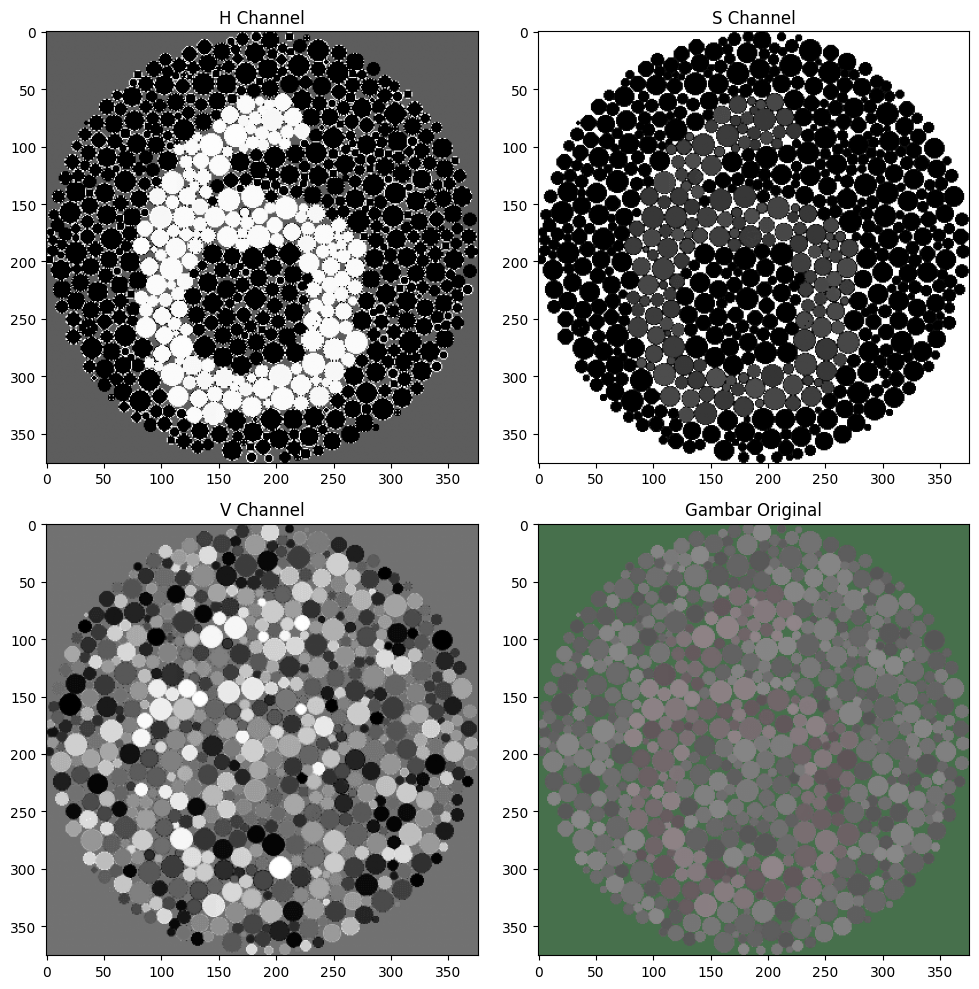

In [13]:
img_NZ_bgr = cv2.imread("6-light.png", cv2.IMREAD_COLOR)
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the H,S,V components
h,s,v = cv2.split(img_hsv)

plt.figure(figsize=[10,10])
plt.subplot(221); plt.imshow(h, cmap="gray"); plt.title("H Channel");
plt.subplot(222); plt.imshow(s, cmap="gray"); plt.title("S Channel");
plt.subplot(223); plt.imshow(v, cmap="gray"); plt.title("V Channel");
plt.subplot(224); plt.imshow(img_NZ_rgb); plt.title("Gambar Original");

plt.tight_layout()
plt.show()

Berdasarkan hasil yang Anda jelaskan, di mana saluran H (Hue) dan S (Saturation) memiliki pola yang lebih jelas, sementara saluran V (Value) dan gambar asli tidak begitu jelas, berikut adalah beberapa kemungkinan alasan dan penjelasan:

### 1. **H Channel (Hue) - Pola yang Jelas**
   - **Penjelasan**: Saluran H menunjukkan informasi tentang **warna** dalam gambar (misalnya merah, hijau, biru, dll.). Jika gambar yang Anda gunakan untuk tes buta warna mengandung warna-warna yang berbeda dengan kontras yang cukup, maka saluran H akan menunjukkan pola yang lebih jelas. Ini karena saluran H mewakili informasi warna yang lebih tajam, terutama jika ada variasi warna yang signifikan dalam gambar.
   - **Mengapa Pola Jelas**: Gambar test buta warna biasanya didesain untuk menampilkan perbedaan warna dengan jelas, yang membuat saluran H lebih terlihat.

### 2. **S Channel (Saturation) - Pola Cukup Jelas**
   - **Penjelasan**: Saluran S menunjukkan **kejenuhan warna** atau intensitas warna. Pada gambar dengan saturasi tinggi, warna akan terlihat lebih kuat, dan pada gambar dengan saturasi rendah, warna akan tampak lebih pudar atau abu-abu.
   - **Mengapa Pola Cukup Jelas**: Saturasi yang jelas membantu dalam memisahkan area dengan warna cerah atau jenuh, meskipun ada kemungkinan gambar Anda tidak memiliki saturasi yang sangat tinggi di semua bagian, sehingga saluran S kurang jelas dibandingkan saluran H.

### 3. **V Channel (Value) - Kurang Jelas**
   - **Penjelasan**: Saluran V menunjukkan **kecerahan atau intensitas** gambar. Ini mencerminkan seberapa terang atau gelap suatu piksel. Jika gambar memiliki pencahayaan yang kurang kontras atau sebagian besar bagian gambar memiliki kecerahan seragam, maka saluran V tidak akan menunjukkan pola yang jelas.
   - **Mengapa Kurang Jelas**: Gambar dengan pencahayaan yang datar atau tidak memiliki banyak kontras antara bagian gelap dan terang akan menyebabkan saluran V kurang efektif dalam menampilkan pola. Jika gambar tersebut lebih dominan pada warna netral atau memiliki area dengan tingkat kecerahan yang seragam, saluran V akan terlihat lebih kabur.

### 4. **Gambar Asli - Tidak Jelas**
   - **Penjelasan**: Gambar asli yang ditampilkan dalam format RGB mengandung campuran informasi dari saluran merah, hijau, dan biru. Jika gambar tersebut memiliki warna yang hampir seragam atau tidak ada kontras yang cukup, maka gambar asli akan terlihat kurang jelas.
   - **Mengapa Tidak Jelas**: Gambar asli yang digunakan untuk tes buta warna kemungkinan memiliki kontras yang rendah, warna yang pudar, atau desain yang tidak menonjolkan detail yang cukup sehingga sulit membedakan pola. Ini mungkin bertujuan untuk menantang penglihatan warna, tetapi juga membuat gambar tersebut kurang jelas.

### Saran untuk Meningkatkan Kejelasan:
1. **Menambah Kontras atau Pencahayaan**: Jika Anda ingin saluran V dan gambar asli lebih jelas, Anda bisa mencoba meningkatkan kontras atau kecerahan gambar menggunakan teknik seperti **histogram equalization** atau **CLAHE (Contrast Limited Adaptive Histogram Equalization)**.
   
   ```python
   # Meningkatkan kontras dengan CLAHE
   clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
   img_hsv[:, :, 2] = clahe.apply(img_hsv[:, :, 2])  # Meningkatkan kecerahan (V Channel)
   img_NZ_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
   ```

2. **Menggunakan Filter atau Peningkatan Kontras**:
   - Anda bisa menggunakan filter seperti **Gaussian Blur** pada saluran H, S, dan V untuk menonjolkan pola lebih baik.
   
   ```python
   h = cv2.GaussianBlur(h, (5, 5), 0)
   s = cv2.GaussianBlur(s, (5, 5), 0)
   v = cv2.GaussianBlur(v, (5, 5), 0)
   ```

3. **Pengolahan Gambar Asli**: Jika gambar asli tidak cukup jelas, Anda bisa mencoba teknik seperti **adaptive thresholding** atau **edge detection** untuk menonjolkan batas-batas gambar.

   ```python
   img_edge = cv2.Canny(cv2.cvtColor(img_NZ_rgb, cv2.COLOR_RGB2GRAY), 100, 200)
   plt.imshow(img_edge, cmap='gray')
   plt.title("Edge Detection")
   plt.show()
   ```

Dengan meningkatkan kontras atau menggunakan beberapa teknik pengolahan gambar tambahan, Anda mungkin bisa membuat saluran V dan gambar asli lebih jelas, dan membantu memperjelas pola dalam gambar tes buta warna.

Proses konversi ke ruang warna **HSV** dan pemisahan komponen-komponennya melibatkan beberapa langkah matematis yang dapat dijelaskan sebagai berikut:

### 1. **Konversi dari RGB ke HSV**

Ruang warna **HSV** (Hue, Saturation, Value) merupakan model warna yang lebih intuitif bagi manusia untuk memahami warna. Dalam ruang RGB, warna ditentukan oleh kombinasi intensitas tiga warna dasar (merah, hijau, biru), sedangkan dalam HSV:
- **H (Hue)** mewakili jenis warna.
- **S (Saturation)** menunjukkan kejenuhan atau intensitas warna.
- **V (Value)** menunjukkan kecerahan atau kecerahan warna tersebut.

Proses konversi dari RGB ke HSV dapat dilakukan dengan rumus matematis sebagai berikut:

#### Langkah-langkah:
1. **Normalisasi RGB**:
   - Sebelum melakukan konversi, kita perlu memastikan bahwa nilai R, G, dan B berada dalam rentang 0 hingga 1 (jika input dalam rentang 0-255, bagi dengan 255).
   
   $$
   R' = \frac{R}{255}, G' = \frac{G}{255}, B' = \frac{B}{255}
   $$

2. **Menentukan nilai `C` (Chroma)**:
   Chroma adalah selisih antara nilai terbesar dan terkecil dari R', G', dan B'. Chroma mengukur seberapa jenuh warna tersebut.

   $$
   C = \max(R', G', B') - \min(R', G', B')
   $$

3. **Menentukan Hue (H)**:
   - Jika **C = 0**, maka Hue tidak terdefinisi (warna abu-abu).
   - Jika **C > 0**, Hue dihitung berdasarkan nilai R', G', dan B' dengan rumus berikut:
   
   $$
   H = \begin{cases} 
   60^\circ \times \left(\frac{G' - B'}{C}\right) & \text{jika } \max(R', G', B') = R' \\
   60^\circ \times \left(\frac{B' - R'}{C} + 2\right) & \text{jika } \max(R', G', B') = G' \\
   60^\circ \times \left(\frac{R' - G'}{C} + 4\right) & \text{jika } \max(R', G', B') = B'
   \end{cases}
   $$

   Nilai Hue akan berada dalam rentang [0, 360] derajat.

4. **Menentukan Saturation (S)**:
   Saturation mengukur sejauh mana warna tersebut jenuh. Jika **C = 0**, maka S = 0 (warna abu-abu), jika **C > 0**, S dihitung dengan rumus:

   $$
   S = \frac{C}{V}
   $$

   di mana **V** adalah nilai tertinggi dari R', G', dan B', atau kecerahan maksimal.

5. **Menentukan Value (V)**:
   Value adalah nilai kecerahan dari warna tersebut dan dihitung sebagai:

   $$
   V = \max(R', G', B')
   $$

#### Ringkasan Rumus:
- **Hue (H)** dalam derajat [0, 360]
- **Saturation (S)** dalam rentang [0, 1]
- **Value (V)** dalam rentang [0, 1]

### 2. **Pemisahan Komponen H, S, dan V**

Setelah konversi ke ruang warna HSV, Anda bisa memisahkan gambar menjadi 3 komponen terpisah: **H**, **S**, dan **V**. Setiap komponen ini dapat diakses secara individual:

- **H (Hue)**: Menyimpan informasi tentang warna (misalnya, merah, biru, hijau).
- **S (Saturation)**: Menyimpan informasi tentang kejenuhan warna (seberapa cerah atau pudar warna tersebut).
- **V (Value)**: Menyimpan informasi tentang kecerahan gambar.

Dengan memisahkan ketiga komponen ini, Anda bisa menganalisis atau memanipulasi bagian-bagian tertentu dari gambar. Misalnya, Anda bisa menyesuaikan saturasi atau kecerahan tanpa memengaruhi warna asli.

### 3. **Contoh Proses dalam OpenCV**

Berikut adalah contoh bagaimana mengonversi gambar dari RGB ke HSV dan memisahkan komponen H, S, dan V dalam OpenCV:

```python
import cv2
import matplotlib.pyplot as plt

# Membaca gambar dalam BGR (default OpenCV)
img_bgr = cv2.imread('image.jpeg')

# Mengonversi gambar ke HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Memisahkan saluran H, S, dan V
h, s, v = cv2.split(img_hsv)

# Menampilkan komponen H, S, V dan gambar asli
plt.figure(figsize=[10, 10])

plt.subplot(221); plt.imshow(h, cmap="gray"); plt.title("Hue Channel")
plt.subplot(222); plt.imshow(s, cmap="gray"); plt.title("Saturation Channel")
plt.subplot(223); plt.imshow(v, cmap="gray"); plt.title("Value Channel")
plt.subplot(224); plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)); plt.title("Original Image")

plt.tight_layout()
plt.show()
```

### 4. **Proses Matriks**
Setelah gambar dikonversi ke HSV dan dipisahkan menjadi komponen H, S, dan V, kita bisa bekerja dengan matriks yang mewakili setiap komponen.

Misalnya, untuk saluran **H**:
- Matriks `h` memiliki dimensi yang sama dengan gambar asli, tetapi setiap elemen matriks ini berisi nilai hue (dalam rentang 0 hingga 360) untuk setiap piksel dalam gambar.

Begitu juga dengan **S** dan **V**:
- Matriks `s` berisi nilai saturasi (dalam rentang 0 hingga 1).
- Matriks `v` berisi nilai kecerahan (dalam rentang 0 hingga 1).

Dengan matriks-matriks ini, Anda dapat memanipulasi gambar, seperti mengubah saturasi atau kecerahan tanpa mengubah informasi warna (hue).

### Ringkasan:
- **HSV** memisahkan informasi warna (Hue), intensitas warna (Saturation), dan kecerahan (Value).
- Proses konversi dan pemisahan komponen ini memberikan kontrol lebih besar atas elemen-elemen gambar tanpa mengubah aspek-aspek lainnya, yang sangat berguna dalam pengolahan citra dan analisis warna.